## Quote prediction: Feature selection

There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 3: Feature selection**

===================================================================================================

##  Feature Selection

In the following cells, I will select a group of variables, the most predictive ones, to build our machine learning models. 

### Why do we need to select variables?

1. For production: Fewer variables mean smaller client input requirements, and hence less code for error handling. This reduces the chances of bugs.
2. For model performance: Fewer variables mean simpler, more interpretable, less over-fitted models

### There are different ways to do the feature selection

1. Filter methods
2. Wrapper methods
3. Embedded methods

In this notebook I have used a filter method VIF (Variance inflation factor) to select the variables.

Let's go ahead and load the datasets.

In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [5]:
# load dataset
# I loaded the datasets with the engineered values: I built and saved these datasets in the previous notebook.

X_train = pd.read_csv('../data/output/xtrain.csv')
X_test = pd.read_csv('../data/output/xtest.csv')

X_train.head()

,Ins_Gender,bmi,"age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]"
0,1,29.0,0,0,1,0,0
1,1,15.9,0,0,1,0,0
2,1,17.3,0,0,0,1,0
3,0,25.8,1,0,0,0,0
4,1,27.3,0,0,0,0,1


In [6]:
# capture the target
y_train = pd.read_csv('../data/output/ytrain.csv')
y_test = pd.read_csv('../data/output/ytest.csv')

y_train.head()

,quote
0,500
1,750
2,1000
3,450
4,500


In [14]:
#import statsmodels.api as sm
#X = sm.add_constant(X_train)
#y=y_train
#model= sm.OLS(y, X).fit()
#model.summary()

### Feature Selection

Correlation matrix

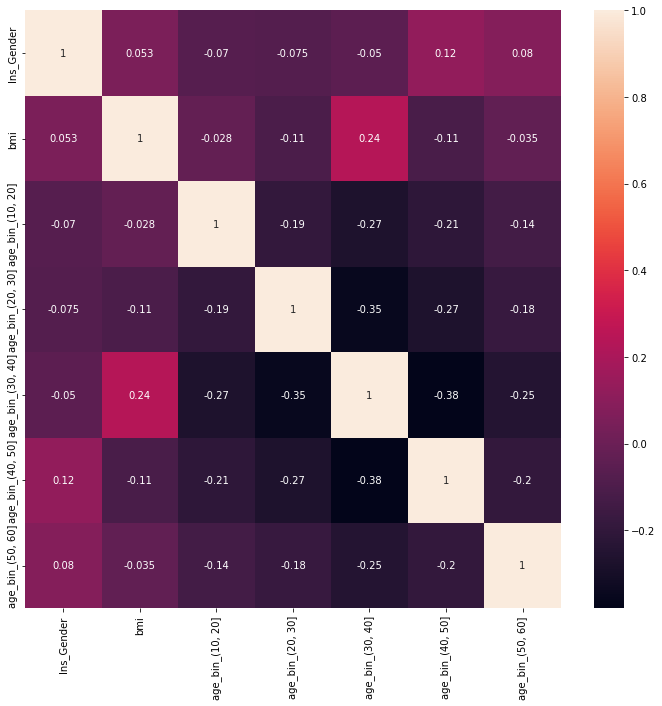

In [7]:
corr = X_train.corr()

# plot the heatmap
plt.figure(figsize=(12,11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.show()

There is some corelation existing between age and bmi.

Only the relationship between two variables can be determined using a correlation matrix. It is unable to inform us of the multicollinearity. To grasp this, we must calculate VIF (Variance inflation factor).

## Calculating VIF

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def vif(cols, data):

    vif_dict = {}
    for col in cols:
        not_col = [i for i in cols if i != col]
        X, y = data[not_col], data[col]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[col] = vif

    # return VIF DataFrame
    df_vif = pd.DataFrame({'vif': vif_dict})

    return df_vif

In [9]:
cols = X_train.columns

In [10]:
vif_value = vif(cols,X_train)

/var/folders/h3/rxb568kj65v3x2q584bz3l600000gn/T/ipykernel_63307/2906110124.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/var/folders/h3/rxb568kj65v3x2q584bz3l600000gn/T/ipykernel_63307/2906110124.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/var/folders/h3/rxb568kj65v3x2q584bz3l600000gn/T/ipykernel_63307/2906110124.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/var/folders/h3/rxb568kj65v3x2q584bz3l600000gn/T/ipykernel_63307/2906110124.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/var/folders/h3/rxb568kj65v3x2q584bz3l600000gn/T/ipykernel_63307/2906110124.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)


In [11]:
vif_value

,vif
Ins_Gender,1.033258
"age_bin_(10, 20]",inf
"age_bin_(20, 30]",inf
"age_bin_(30, 40]",inf
"age_bin_(40, 50]",inf
"age_bin_(50, 60]",inf
bmi,1.068906


Normally, columns with a vif value greater than 5 are removed. However, because all of the vif values are less than 5, we can model all of the features.